### **PCA FH (FT): Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011 PCA for Female Headed Household Excluding Institutional Household. The Indian Census has the reputation of being one of the best in the world.** 

### The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. 

### The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc. The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990. The Primary Census Abstract which is important publication of 2011 Census gives basic information on Area, Total Number of Households, Total Population, Scheduled Castes, Scheduled Tribes Population, Population in the age group 0-6, Literates, Main Workers and Marginal Workers classified by the four broad industrial categories, namely, 
#### (i) Cultivators, 
#### (ii) Agricultural Laborers, 
#### (iii) Household Industry Workers, and 
#### (iv) Other Workers and also Non-Workers. 

### The characteristics of the Total Population include Scheduled Castes, Scheduled Tribes, Institutional and Houseless Population and are presented by sex and rural-urban residence. Census 2011 covered 35 States/Union Territories, 640 districts, 5,924 sub-districts, 7,935 Towns and 6,40,867 Villages.

### The data collected has so many variables thus making it difficult to find useful details without using Data Science Techniques. You are tasked to perform detailed EDA and identify Optimum Principal Components that explains the most variance in data. Use Sklearn only.

### Reading the data and performing basic checks like checking head, info, summary, nulls, and duplicates, etc.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer

In [2]:
# Reading the data
df = pd.read_excel('PCA India Data_Census.xlsx')

In [3]:
# Head of the data set
df.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [4]:
# Tail of the data set
df.tail()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
635,34,636,Puducherry,Mahe,3333,8154,11781,1146,1203,21,...,32,47,0,0,0,0,0,0,32,47
636,34,637,Puducherry,Karaikal,10612,12346,21691,1544,1533,2234,...,155,337,3,14,38,130,4,23,110,170
637,35,638,Andaman & Nicobar Island,Nicobars,1275,1549,2630,227,225,0,...,104,134,9,4,2,6,17,47,76,77
638,35,639,Andaman & Nicobar Island,North & Middle Andaman,3762,5200,8012,723,664,0,...,136,172,24,44,11,21,1,4,100,103
639,35,640,Andaman & Nicobar Island,South Andaman,7975,11977,18049,1470,1358,0,...,173,122,6,2,17,17,2,4,148,99


In [5]:
# Shape of the data
df.shape

(640, 61)

In [6]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [7]:
# Checking for null values
df.isnull().sum().sum()

0

In [8]:
# Checking for duplicate values
df.duplicated().sum()

0

In [9]:
# Checking the description of data:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.500000,184.896367,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0


### Observations:
1. Data consists of 640 rows and 61 columns.
2. There are no missing values in the data.
3. There are no duplicate values in the data.
4. There are 2 object data type and 59 integer data types. 

In [10]:
#Checking the value counts for categorical variables
df.State.value_counts()

Uttar Pradesh               71
Madhya Pradesh              50
Bihar                       38
Maharashtra                 35
Rajasthan                   33
Tamil Nadu                  32
Karnataka                   30
Odisha                      30
Assam                       27
Gujarat                     26
Jharkhand                   24
Andhra Pradesh              23
Jammu & Kashmir             22
Haryana                     21
Punjab                      20
West Bengal                 19
Chhattisgarh                18
Arunachal Pradesh           16
Kerala                      14
Uttarakhand                 13
Himachal Pradesh            12
Nagaland                    11
Manipur                      9
NCT of Delhi                 9
Mizoram                      8
Meghalaya                    7
Tripura                      4
Sikkim                       4
Puducherry                   4
Andaman & Nicobar Island     3
Goa                          2
Daman & Diu                  2
Lakshadw

### Exploratory analysis 

In [ ]:
# Checking the corelation between the variables
sns.pairplot(df,diag_kind='kde');

#### Which state has the highest gender ratio and which has the lowest?

In [11]:
EDA = df.copy(deep=True)

In [12]:
EDA['GenderRatio'] = EDA['TOT_F']/EDA['TOT_M']

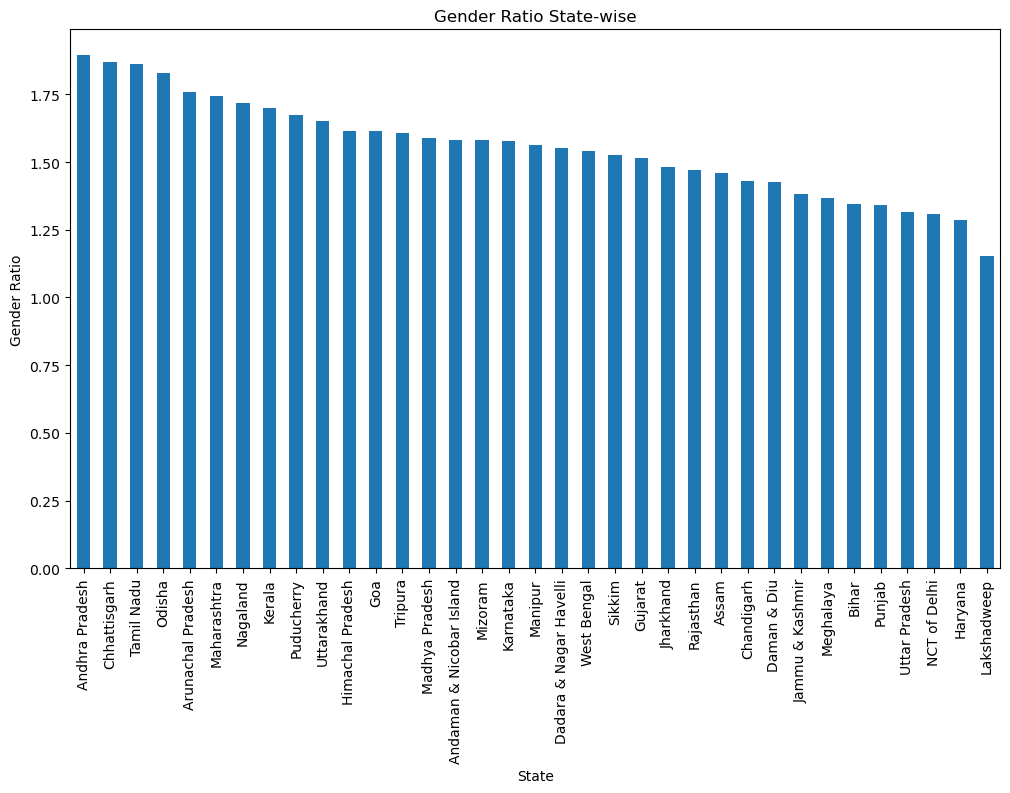

In [16]:
plt.title('Gender Ratio State-wise')
plt.ylabel('Gender Ratio')
EDA.groupby('State').mean()['GenderRatio'].sort_values(ascending=False).plot(kind='bar',figsize=(12,7));

#### Observations
On taking a look at the above charts with respect to Gender Ration state wise, we can conclude the following:
1. The Gender ratio is highest in Andhra Pradesh followed by Chhattisgarh.
2. The Gender ratio is the lowest in Lakshadweep.

#### Which state has the highest and lowest literacy among both genders?

In [17]:
EDA['Female Literacy Ratio'] = EDA['F_LIT'] / (EDA['M_LIT'] + EDA['F_LIT']) *100

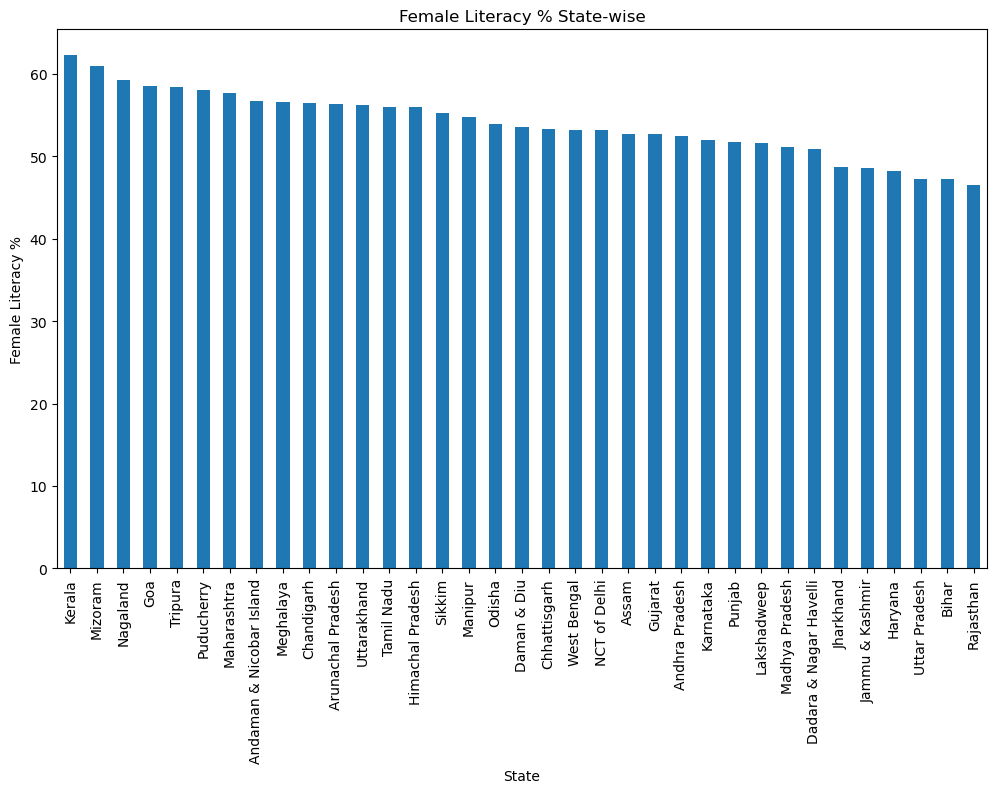

In [18]:
plt.title('Female Literacy % State-wise')
plt.ylabel('Female Literacy %')
EDA.groupby(['State']).mean()['Female Literacy Ratio'].sort_values(ascending=False).plot(kind='bar',figsize=(12,7));

In [19]:
EDA['Male Literacy Ratio'] = EDA['M_LIT'] / (EDA['M_LIT'] + EDA['F_LIT']) *100

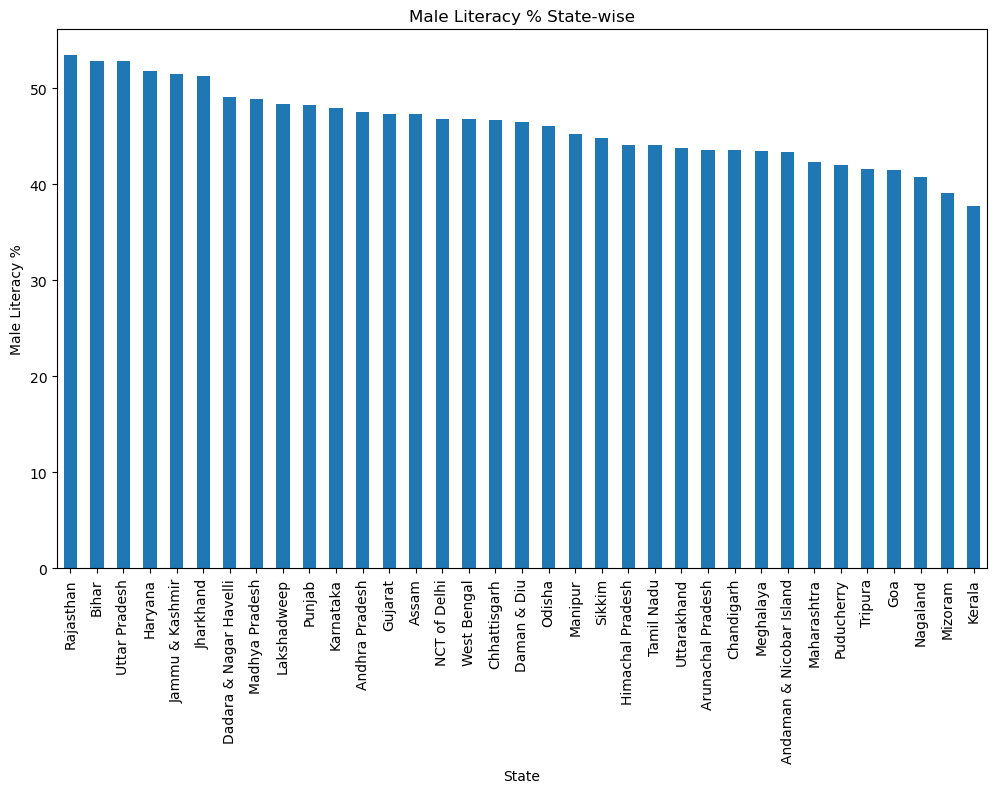

In [20]:
plt.title('Male Literacy % State-wise')
plt.ylabel('Male Literacy %')
EDA.groupby(['State']).mean()['Male Literacy Ratio'].sort_values(ascending=False).plot(kind='bar',figsize=(12,7));

#### Observations
On taking a look at the graphs above, we can conclude the following:
1. Rajasthan has the highest educated male followed by Bihar. 
2. The lowest in male literacy is Kerala. 
3. Kerala has the highest female educated followed by Mizoram. 
4. City Rajasthan has the lowest literacy rate amongst women and highest among males.

#### Which state has the highest Total worker population among both the genders?

In [21]:
EDA['Male Total worker population'] = EDA['TOT_WORK_M']/EDA['TOT_WORK_M'] + EDA['TOT_WORK_F']*100

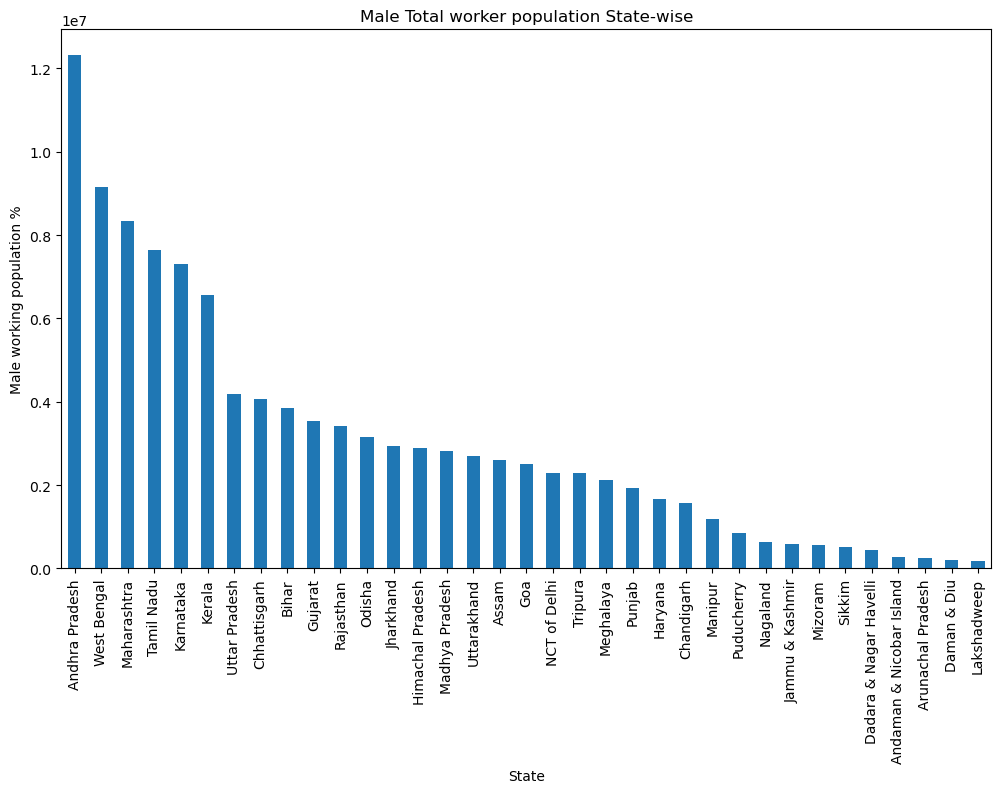

In [22]:
plt.title('Male Total worker population State-wise')
plt.ylabel('Male working population %')
EDA.groupby(['State']).mean()['Male Total worker population'].sort_values(ascending=False).plot(kind='bar',figsize=(12,7));

In [23]:
EDA['Female Total worker population'] = EDA['TOT_WORK_F'] / (EDA['TOT_WORK_M'] + EDA['TOT_WORK_F']) *100

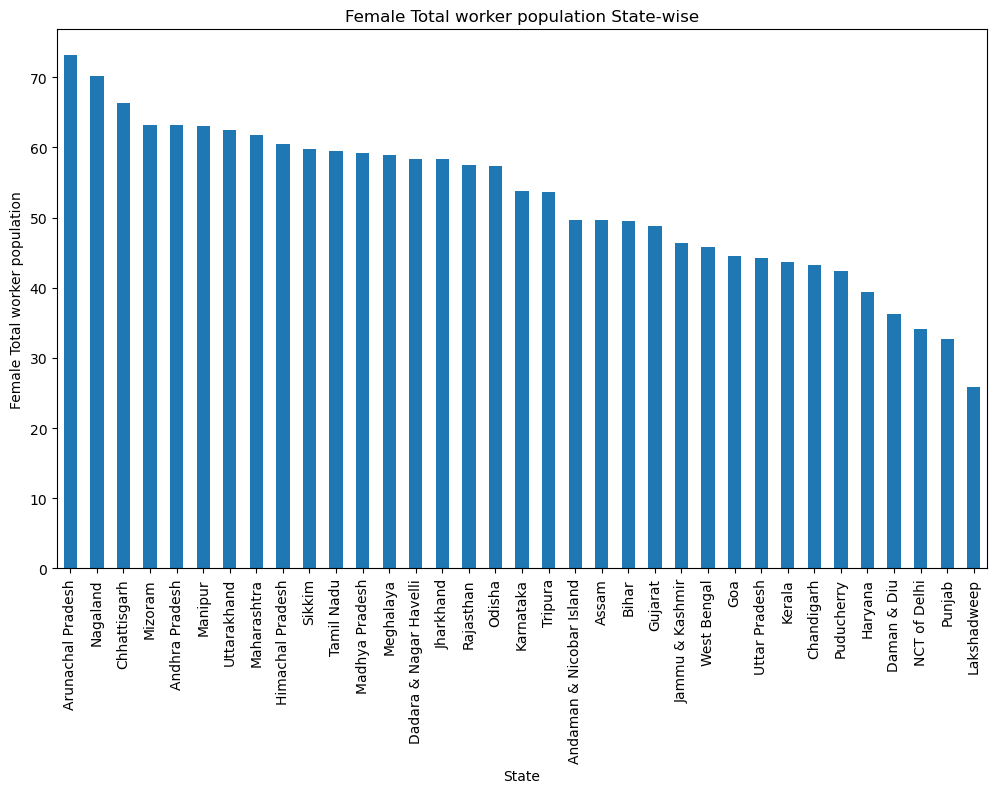

In [24]:
plt.title('Female Total worker population State-wise')
plt.ylabel('Female Total worker population')
EDA.groupby(['State']).mean()['Female Total worker population'].sort_values(ascending=False).plot(kind='bar',figsize=(12,7));

#### Observations 
On taking a look at the graphs above, we can conclude the following:
1. Female total working population is highest in Arunachal pradesh and lowest in Lakshadweep. 
2. Male total working population is highest in Andhra Pradesh and lowest in Lakshadweep.


#### Comparing non-working and working population among both genders.

In [26]:
EDA['Male Total Non worker population'] = EDA['NON_WORK_M']/EDA['NON_WORK_M'] + EDA['NON_WORK_F']*100

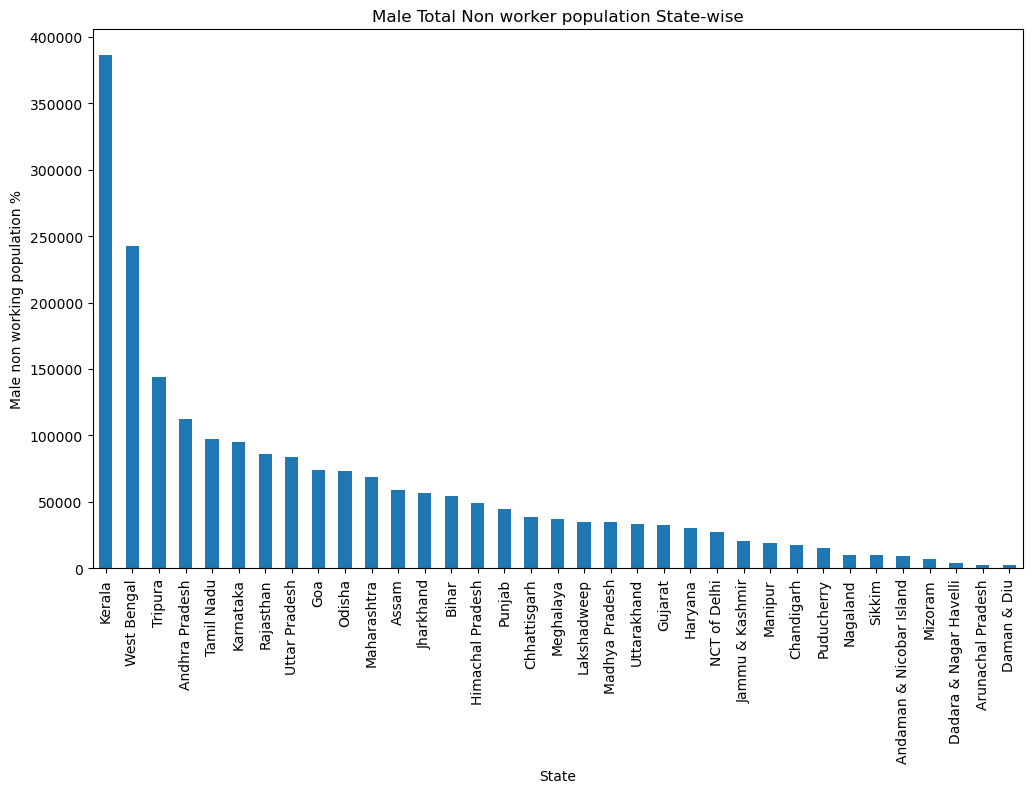

In [27]:
plt.title('Male Total Non worker population State-wise')
plt.ylabel('Male non working population %')
EDA.groupby(['State']).mean()['Male Total Non worker population'].sort_values(ascending=False).plot(kind='bar',figsize=(12,7));

In [28]:
EDA['Female Total Non worker population'] = EDA['NON_WORK_F']/EDA['NON_WORK_M'] + EDA['NON_WORK_F']*100

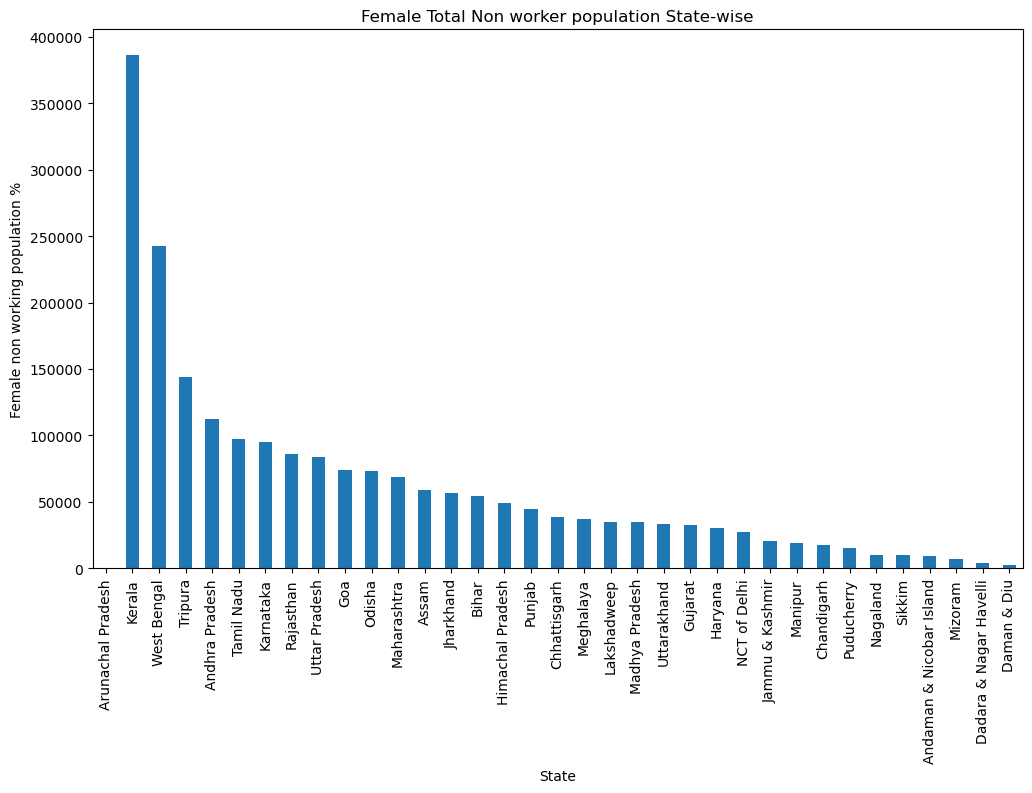

In [29]:
plt.title('Female Total Non worker population State-wise')
plt.ylabel('Female non working population %')
EDA.groupby(['State']).mean()['Female Total Non worker population'].sort_values(ascending=False).plot(kind='bar',figsize=(12,7));

#### Observations
On comparing the non-worker population between Male and female, we can say the following:
1. Female non-worker population is the highest in Kerala and lowest in Daman.
2. Male non-worker population is highest in Kerala and lowest in Daman.
3. We also notice that Kerala, despite being the state for highest literacy for female, women do not work. We can say that because the highest female non-worker population is highest in Kerala.

### Outliers

In [30]:
corr = df.corr()
corr

,State Code,Dist.Code,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
State Code,1.000000,0.993021,0.384425,0.166238,0.273080,0.052300,0.063743,0.049352,0.149796,0.240812,...,-0.095886,0.007735,-0.302827,-0.280099,-0.094719,0.071378,-0.092472,0.034044,0.125528,0.231722
Dist.Code,0.993021,1.000000,0.376971,0.164378,0.269653,0.058868,0.071644,0.042254,0.142388,0.234392,...,-0.092615,0.006943,-0.308021,-0.286156,-0.076510,0.085265,-0.078145,0.033291,0.112092,0.212802
No_HH,0.384425,0.376971,1.000000,0.916170,0.970590,0.797559,0.796373,0.775309,0.823847,0.149627,...,0.556941,0.555543,0.067425,0.046128,0.368591,0.417447,0.486747,0.536854,0.762384,0.735692
TOT_M,0.166238,0.164378,0.916170,1.000000,0.982640,0.950825,0.947792,0.839925,0.826299,0.091421,...,0.698310,0.595696,0.167405,0.115580,0.495928,0.440360,0.651604,0.588180,0.844896,0.716061
TOT_F,0.273080,0.269653,0.970590,0.982640,1.000000,0.907975,0.906557,0.816959,0.832756,0.123626,...,0.655347,0.598951,0.138763,0.099438,0.451011,0.443132,0.593805,0.571853,0.827653,0.746583
M_06,0.052300,0.058868,0.797559,0.950825,0.907975,1.000000,0.998151,0.781120,0.747530,0.055274,...,0.760610,0.646998,0.266674,0.198338,0.601090,0.514055,0.690601,0.565030,0.784961,0.651143
F_06,0.063743,0.071644,0.796373,0.947792,0.906557,0.998151,1.000000,0.773135,0.741686,0.065138,...,0.763614,0.649834,0.258670,0.189568,0.611568,0.523270,0.698636,0.574178,0.783727,0.651439
M_SC,0.049352,0.042254,0.775309,0.839925,0.816959,0.781120,0.773135,1.000000,0.985071,-0.045666,...,0.673633,0.569579,0.184332,0.129750,0.523450,0.461898,0.664918,0.591437,0.735399,0.580020
F_SC,0.149796,0.142388,0.823847,0.826299,0.832756,0.747530,0.741686,0.985071,1.000000,-0.014122,...,0.650455,0.585690,0.163427,0.116228,0.508006,0.488657,0.628470,0.589346,0.720099,0.600089
M_ST,0.240812,0.234392,0.149627,0.091421,0.123626,0.055274,0.065138,-0.045666,-0.014122,1.000000,...,0.122967,0.196571,0.027219,0.007077,0.126336,0.238813,-0.005482,0.090123,0.122986,0.146954


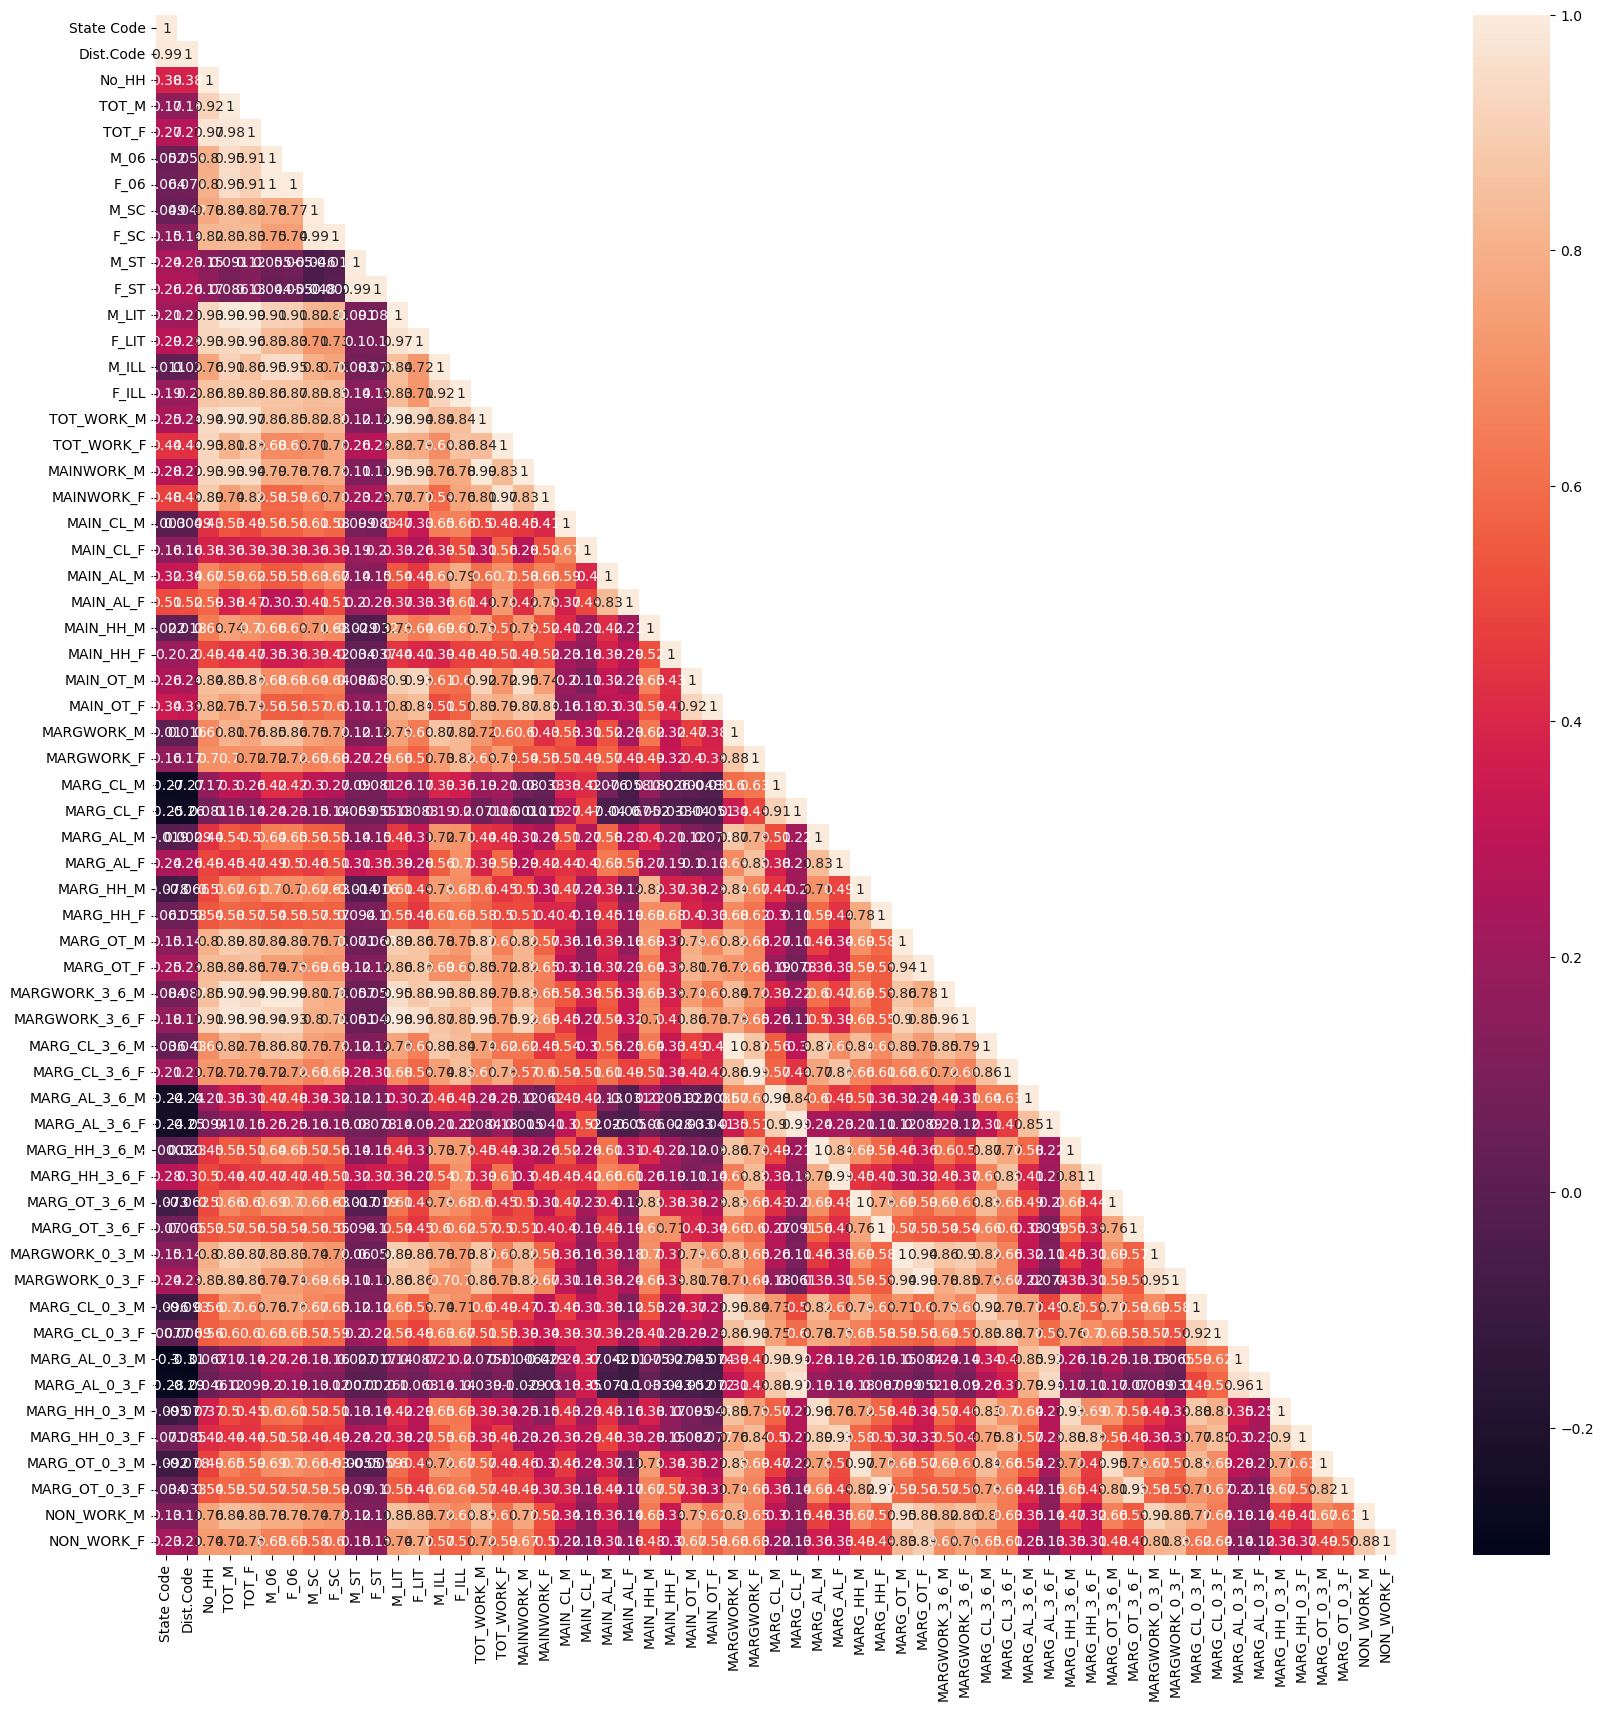

In [34]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True,mask=np.triu(corr,+1));

In [36]:
df.drop(labels=['State Code','Dist.Code'], axis=1, inplace=True)

In [37]:
df_num = df.select_dtypes(include ='int64')
df_num.head

<bound method NDFrame.head of      No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  F_SC  M_ST   F_ST  M_LIT  ...  \
0     7707  23388  29796  5862  6196     3     0  1999   2598  13381  ...   
1     6218  19585  23102  4482  3733     7     6   427    517  10513  ...   
2     4452   6546  10964  1082  1018     3     6  5806   9723   4534  ...   
3     1320   2784   4206   563   677     0     0  2666   3968   1842  ...   
4    11654  20591  29981  5157  4587    20    33  7670  10843  13243  ...   
..     ...    ...    ...   ...   ...   ...   ...   ...    ...    ...  ...   
635   3333   8154  11781  1146  1203    21    30     0      0   6916  ...   
636  10612  12346  21691  1544  1533  2234  4155     0      0  10292  ...   
637   1275   1549   2630   227   225     0     0  1012   1750   1187  ...   
638   3762   5200   8012   723   664     0     0    28     50   4206  ...   
639   7975  11977  18049  1470  1358     0     0   161    264  10095  ...   

     MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_

In [38]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   No_HH           640 non-null    int64
 1   TOT_M           640 non-null    int64
 2   TOT_F           640 non-null    int64
 3   M_06            640 non-null    int64
 4   F_06            640 non-null    int64
 5   M_SC            640 non-null    int64
 6   F_SC            640 non-null    int64
 7   M_ST            640 non-null    int64
 8   F_ST            640 non-null    int64
 9   M_LIT           640 non-null    int64
 10  F_LIT           640 non-null    int64
 11  M_ILL           640 non-null    int64
 12  F_ILL           640 non-null    int64
 13  TOT_WORK_M      640 non-null    int64
 14  TOT_WORK_F      640 non-null    int64
 15  MAINWORK_M      640 non-null    int64
 16  MAINWORK_F      640 non-null    int64
 17  MAIN_CL_M       640 non-null    int64
 18  MAIN_CL_F       640 non-null  

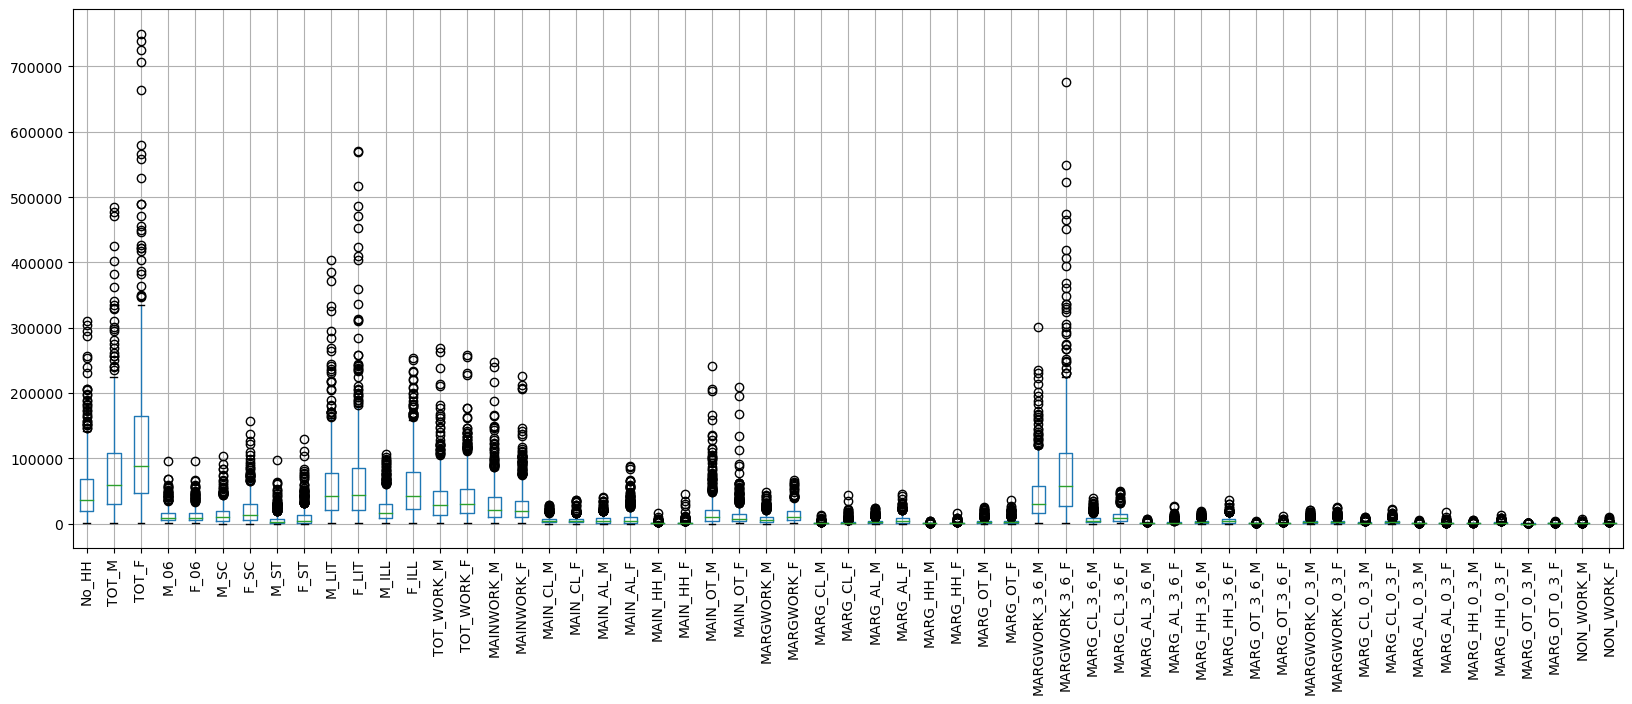

In [39]:
# Checking outliers
df_num.boxplot(figsize=(20,7))
plt.xticks(rotation=90)
plt.show()

#### Answer: No, treating outliers is not necessary in this case as you never eliminate outliers unless they are the result from a processing mistake or wrong measurement. True outliers must be kept in the data while doing PCA.

### Scaling the Data using z-score method

#Test 1: Bartletts Test of Sphericity - Tests the hypothesis that the variables are uncorrelated in the population.
1. HO: All variables in the data are uncorrelated
2. HA: At least one pair of variables in the data are correlated
#If the null hypothesis cannot be rejected, then PCA is not advisable. If the p-value is small, then we can reject the null hypothesis and agree that there is at least one pair of variables in the data which are correlated hence PCA is recommended.

In [71]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_num_scaled)
p_value

C:\Users\cheru\anaconda3\lib\site-packages\factor_analyzer\factor_analyzer.py:118: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)
C:\Users\cheru\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1388: RuntimeWarning: invalid value encountered in subtract
  return sc.xlogy(df/2.-1, x) - x/2. - sc.gammaln(df/2.) - (np.log(2)*df)/2.


nan

#### KMO Test

The Kaiser-Meyer-Olkin (KMO) - measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is.

Generally, if MSA is less than 0.5, PCA is not recommended, since no reduction is expected. On the other hand, MSA > 0.7 is expected to provide a considerable reduction is the dimension and extraction of meaningful components.

In [40]:
# Scaling the data based on Zscore
from scipy.stats import zscore
df_num_scaled=df_num.apply(zscore)
df_num_scaled.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,-0.476423,-0.798097,...,-0.163229,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614
1,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,-0.607607,-0.849434,...,-0.583103,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988
2,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,-0.027273,-0.956457,...,-0.859212,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839
3,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,-0.390060,-1.004643,...,-0.805468,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038
4,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,0.043330,-0.800568,...,-0.348645,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344


In [41]:
df_num_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   No_HH           640 non-null    float64
 1   TOT_M           640 non-null    float64
 2   TOT_F           640 non-null    float64
 3   M_06            640 non-null    float64
 4   F_06            640 non-null    float64
 5   M_SC            640 non-null    float64
 6   F_SC            640 non-null    float64
 7   M_ST            640 non-null    float64
 8   F_ST            640 non-null    float64
 9   M_LIT           640 non-null    float64
 10  F_LIT           640 non-null    float64
 11  M_ILL           640 non-null    float64
 12  F_ILL           640 non-null    float64
 13  TOT_WORK_M      640 non-null    float64
 14  TOT_WORK_F      640 non-null    float64
 15  MAINWORK_M      640 non-null    float64
 16  MAINWORK_F      640 non-null    float64
 17  MAIN_CL_M       640 non-null    flo

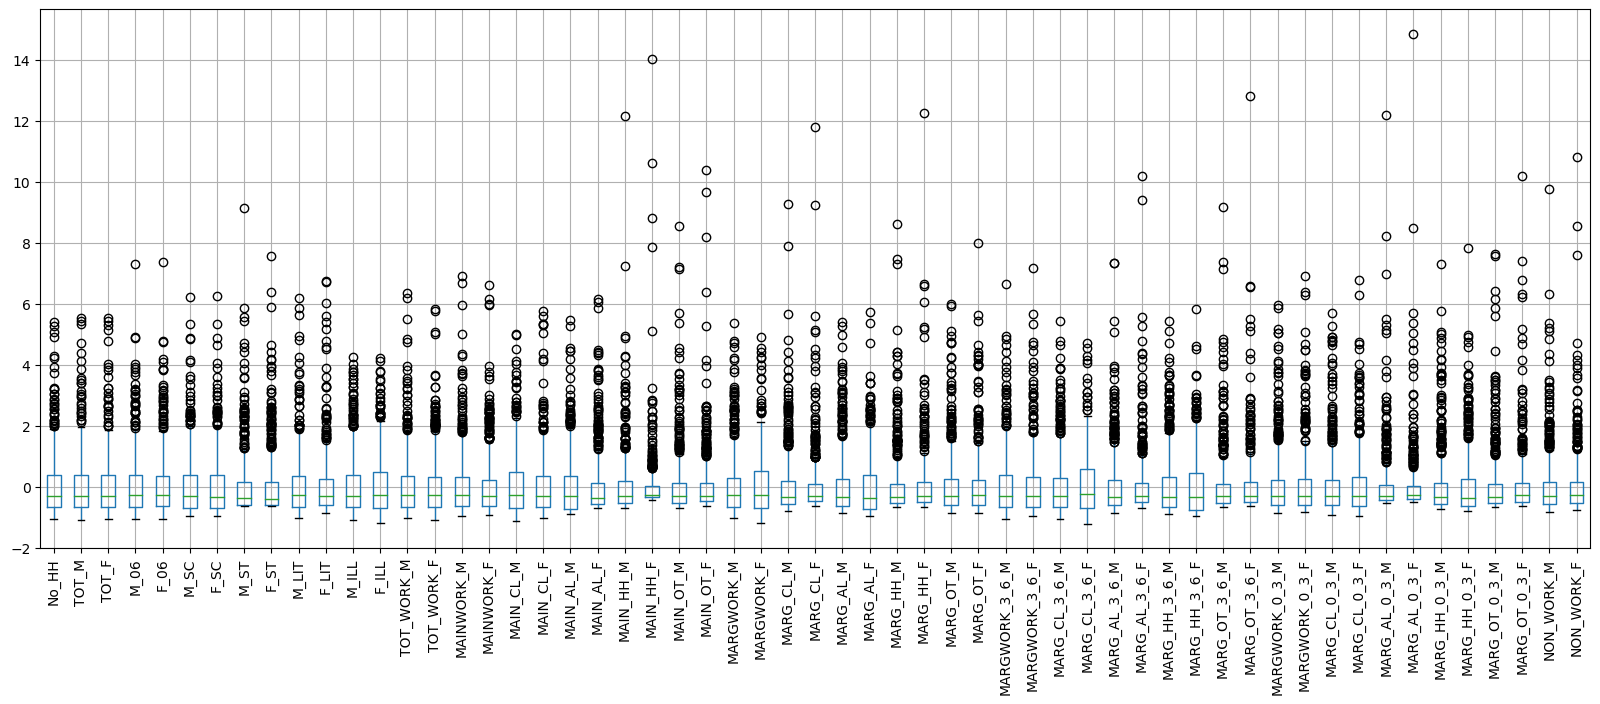

In [42]:
#Boxplot post scaling
df_num_scaled.boxplot(figsize=(20,7))
plt.xticks(rotation=90)
plt.show()

#### Observations:

Scaling needs to be done as the values of the variables are different. Scaling will have all the values in the relative same range. Z score has been used to standardised the data to relative same scale -3 to +3.

We can clearly see from the above box plots that scaling does have an effect on outliers. We choose to go ahead with the analysis without treating the outliers. 

### Performing all the required steps for PCA (use sklearn). Created the covariance Matrix, eigen values and eigen vector.

In [43]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

pd.set_option('display.expand_frame_repr', True)
pd.get_option("display.max_rows")
np.set_printoptions(threshold=np.inf)

In [44]:
from sklearn.decomposition import PCA 
pca = PCA(random_state=123)
df_pca = pca.fit_transform(df_num_scaled)

In [45]:
#cov matrix
pd.DataFrame(np.round(pca.get_covariance(),2),columns=df_num_scaled.columns,index=df_num_scaled.columns) 

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,F_LIT,M_ILL,F_ILL,TOT_WORK_M,TOT_WORK_F,MAINWORK_M,MAINWORK_F,MAIN_CL_M,MAIN_CL_F,MAIN_AL_M,MAIN_AL_F,MAIN_HH_M,MAIN_HH_F,MAIN_OT_M,MAIN_OT_F,MARGWORK_M,MARGWORK_F,MARG_CL_M,MARG_CL_F,MARG_AL_M,MARG_AL_F,MARG_HH_M,MARG_HH_F,MARG_OT_M,MARG_OT_F,MARGWORK_3_6_M,MARGWORK_3_6_F,MARG_CL_3_6_M,MARG_CL_3_6_F,MARG_AL_3_6_M,MARG_AL_3_6_F,MARG_HH_3_6_M,MARG_HH_3_6_F,MARG_OT_3_6_M,MARG_OT_3_6_F,MARGWORK_0_3_M,MARGWORK_0_3_F,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
No_HH,1.00,0.92,0.97,0.80,0.80,0.78,0.83,0.15,0.17,0.93,0.93,0.76,0.86,0.94,0.93,0.93,0.89,0.43,0.38,0.67,0.59,0.64,0.49,0.85,0.82,0.68,0.70,0.17,0.08,0.44,0.49,0.50,0.54,0.80,0.83,0.85,0.92,0.69,0.72,0.21,0.09,0.45,0.50,0.50,0.53,0.80,0.83,0.56,0.56,0.07,0.05,0.37,0.42,0.49,0.54,0.76,0.74
TOT_M,0.92,1.00,0.98,0.95,0.95,0.84,0.83,0.09,0.09,0.99,0.93,0.91,0.89,0.97,0.81,0.93,0.75,0.53,0.36,0.59,0.38,0.74,0.44,0.85,0.75,0.81,0.70,0.30,0.15,0.54,0.45,0.67,0.58,0.89,0.84,0.98,0.98,0.82,0.72,0.35,0.17,0.55,0.44,0.67,0.57,0.89,0.84,0.70,0.60,0.17,0.12,0.50,0.44,0.65,0.59,0.85,0.72
TOT_F,0.97,0.98,1.00,0.91,0.91,0.82,0.83,0.12,0.13,0.99,0.96,0.86,0.89,0.97,0.88,0.94,0.82,0.49,0.39,0.62,0.47,0.70,0.47,0.86,0.80,0.77,0.72,0.26,0.14,0.50,0.48,0.61,0.57,0.87,0.86,0.94,0.98,0.78,0.74,0.31,0.15,0.51,0.47,0.60,0.56,0.87,0.86,0.66,0.60,0.14,0.10,0.45,0.44,0.59,0.57,0.83,0.75
M_06,0.80,0.95,0.91,1.00,1.00,0.78,0.75,0.06,0.04,0.91,0.83,0.95,0.86,0.86,0.68,0.79,0.59,0.56,0.38,0.55,0.30,0.66,0.36,0.69,0.56,0.85,0.72,0.42,0.24,0.64,0.49,0.70,0.54,0.84,0.75,0.99,0.94,0.86,0.72,0.47,0.25,0.64,0.47,0.69,0.53,0.84,0.74,0.76,0.65,0.27,0.20,0.60,0.51,0.69,0.57,0.79,0.65
F_06,0.80,0.95,0.91,1.00,1.00,0.77,0.74,0.07,0.05,0.91,0.83,0.95,0.87,0.85,0.69,0.79,0.59,0.56,0.38,0.56,0.30,0.66,0.36,0.68,0.56,0.86,0.72,0.42,0.23,0.65,0.50,0.70,0.55,0.84,0.75,0.99,0.94,0.87,0.72,0.48,0.25,0.65,0.48,0.70,0.54,0.84,0.74,0.76,0.65,0.26,0.19,0.61,0.52,0.70,0.58,0.78,0.65
M_SC,0.78,0.84,0.82,0.78,0.77,1.00,0.99,-0.05,-0.05,0.82,0.72,0.80,0.83,0.83,0.71,0.78,0.65,0.61,0.36,0.63,0.41,0.71,0.39,0.64,0.58,0.75,0.66,0.30,0.15,0.56,0.46,0.67,0.57,0.75,0.69,0.81,0.80,0.75,0.66,0.34,0.16,0.57,0.45,0.66,0.56,0.74,0.69,0.67,0.57,0.18,0.13,0.52,0.46,0.67,0.59,0.74,0.58
F_SC,0.83,0.83,0.83,0.75,0.74,0.99,1.00,-0.01,-0.01,0.82,0.73,0.76,0.85,0.82,0.78,0.78,0.71,0.58,0.39,0.67,0.51,0.68,0.42,0.64,0.60,0.73,0.68,0.28,0.14,0.55,0.51,0.63,0.57,0.73,0.70,0.79,0.79,0.73,0.70,0.32,0.15,0.56,0.51,0.63,0.55,0.72,0.70,0.65,0.59,0.16,0.12,0.51,0.49,0.63,0.59,0.72,0.60
M_ST,0.15,0.09,0.12,0.06,0.07,-0.05,-0.01,1.00,0.99,0.09,0.10,0.08,0.14,0.12,0.27,0.11,0.23,0.10,0.19,0.14,0.20,-0.03,0.03,0.09,0.17,0.12,0.27,0.09,0.06,0.14,0.31,-0.01,0.09,0.07,0.12,0.06,0.05,0.12,0.28,0.12,0.08,0.14,0.32,-0.02,0.09,0.06,0.11,0.12,0.20,0.03,0.01,0.13,0.24,-0.01,0.09,0.12,0.15
F_ST,0.17,0.09,0.13,0.04,0.05,-0.05,-0.01,0.99,1.00,0.09,0.10,0.07,0.15,0.12,0.29,0.11,0.25,0.08,0.20,0.15,0.23,-0.03,0.04,0.08,0.17,0.12,0.29,0.08,0.06,0.15,0.35,-0.02,0.10,0.06,0.12,0.05,0.05,0.12,0.31,0.11,0.08,0.15,0.37,-0.02,0.10,0.05,0.11,0.12,0.22,0.02,0.00,0.14,0.27,-0.01,0.10,0.11,0.15
M_LIT,0.93,0.99,0.99,0.91,0.91,0.82,0.82,0.09,0.09,1.00,0.97,0.84,0.84,0.98,0.82,0.95,0.77,0.47,0.33,0.54,0.37,0.73,0.45,0.90,0.80,0.75,0.66,0.26,0.13,0.46,0.39,0.62,0.55,0.90,0.86,0.95,0.99,0.76,0.68,0.30,0.14,0.46,0.38,0.61,0.54,0.89,0.86,0.65,0.56,0.14,0.10,0.42,0.38,0.60,0.55,0.85,0.74


In [46]:
#Eigen vectors:
eigenvec=pca.components_
print('Eigenvectors:',np.round(eigenvec,2))

Eigenvectors: [[ 0.16  0.17  0.17  0.16  0.16  0.15  0.15  0.03  0.03  0.16  0.15  0.16
   0.17  0.16  0.15  0.15  0.12  0.1   0.07  0.11  0.07  0.13  0.08  0.12
   0.11  0.16  0.16  0.08  0.05  0.13  0.11  0.14  0.13  0.16  0.15  0.16
   0.16  0.17  0.16  0.09  0.05  0.13  0.11  0.14  0.12  0.15  0.15  0.15
   0.14  0.05  0.04  0.12  0.12  0.14  0.13  0.15  0.13]
 [-0.13 -0.09 -0.1  -0.02 -0.02 -0.05 -0.05  0.03  0.03 -0.12 -0.15 -0.01
  -0.01 -0.13 -0.09 -0.18 -0.15  0.06  0.09 -0.03 -0.06 -0.08 -0.08 -0.21
  -0.21  0.09  0.13  0.27  0.25  0.17  0.14  0.07  0.02 -0.09 -0.12 -0.04
  -0.11  0.08  0.1   0.26  0.24  0.16  0.13  0.06  0.01 -0.09 -0.13  0.15
   0.18  0.25  0.24  0.19  0.18  0.08  0.05 -0.07 -0.07]
 [-0.    0.06  0.04  0.06  0.05  0.   -0.03 -0.12 -0.14  0.08  0.12 -0.02
  -0.09  0.05 -0.06  0.05 -0.06 -0.07 -0.01 -0.25 -0.25  0.03 -0.06  0.14
   0.1  -0.01 -0.05  0.2   0.27 -0.19 -0.27 -0.02 -0.08  0.11  0.1   0.06
   0.08 -0.02 -0.07  0.15  0.26 -0.2  -0.28 -0.02 -0.08  0

In [47]:
#Eigen Values:
eigenvalues=pca.explained_variance_
print('Eigenvalues:',np.round(eigenvalues,2))

Eigenvalues: [3.181e+01 7.870e+00 4.150e+00 3.670e+00 2.210e+00 1.940e+00 1.180e+00
 7.500e-01 6.200e-01 5.300e-01 4.300e-01 3.500e-01 3.000e-01 2.800e-01
 1.900e-01 1.400e-01 1.100e-01 1.100e-01 1.000e-01 8.000e-02 6.000e-02
 4.000e-02 4.000e-02 3.000e-02 3.000e-02 2.000e-02 1.000e-02 1.000e-02
 1.000e-02 1.000e-02 1.000e-02 1.000e-02 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00]


In [48]:
var_exp=np.round(pca.explained_variance_ratio_,2)*100

In [49]:
var_exp

array([56., 14.,  7.,  6.,  4.,  3.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.])

### Identifying the optimum number of PCs (90% explained variance) showing Scree plot.

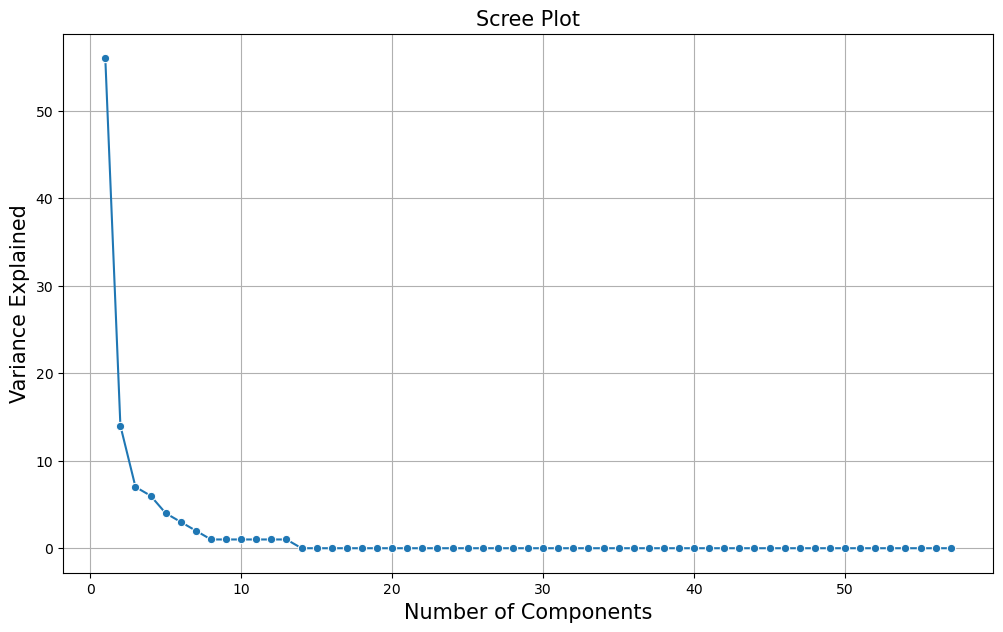

In [50]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [56]:
#Check the cumulative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 ])

In [51]:
# Apply PCA for the number of decided components to get the loadings and component output

from sklearn.decomposition import PCA
pca = PCA(n_components=6,random_state=123)
df_pca = pca.fit_transform(df_num_scaled)
df_pca.transpose() # Component output

array([[-4.61726348e+00, -4.77166187e+00, -5.96483558e+00,
        -6.28079629e+00, -4.47856622e+00, -3.31996343e+00,
        -5.02139317e+00, -4.60870926e+00, -5.18670311e+00,
        -4.22619010e+00, -5.78001693e+00, -5.35942744e+00,
        -6.11923869e+00, -3.91196651e+00, -5.76828055e+00,
        -5.34613097e+00, -6.03146896e+00, -5.96962170e+00,
        -4.46224144e+00, -5.65016490e+00, -1.05266642e+00,
        -5.59000483e+00, -1.27680358e+00,  1.03424020e+01,
        -6.45335360e+00, -3.98360010e+00,  3.69769823e+00,
        -4.91716205e-01, -2.81046966e+00, -2.72555820e+00,
        -3.32866777e+00, -3.86224557e+00, -2.08348548e+00,
        -6.15835849e+00,  2.59503492e+00, -3.42870301e+00,
         2.34847703e+00,  1.02618609e+00, -3.72110853e+00,
        -4.97585558e+00,  4.54072146e+00, -3.08562050e+00,
        -8.18860964e-02, -3.65537457e+00, -4.75102941e+00,
        -2.27762291e+00, -3.75363062e+00, -9.64322727e-01,
         2.49973239e+00, -1.18726792e+00, -3.75506418e+0

In [52]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(df_num_scaled),index=['PC1','PC2','PC3','PC4','PC5','PC6'])
df_pca_loading.shape

(6, 57)

In [53]:
df_pca_loading = np.round(df_pca_loading,2)

### Comparing PCs with Actual Columns and identify which is explaining most variance. 

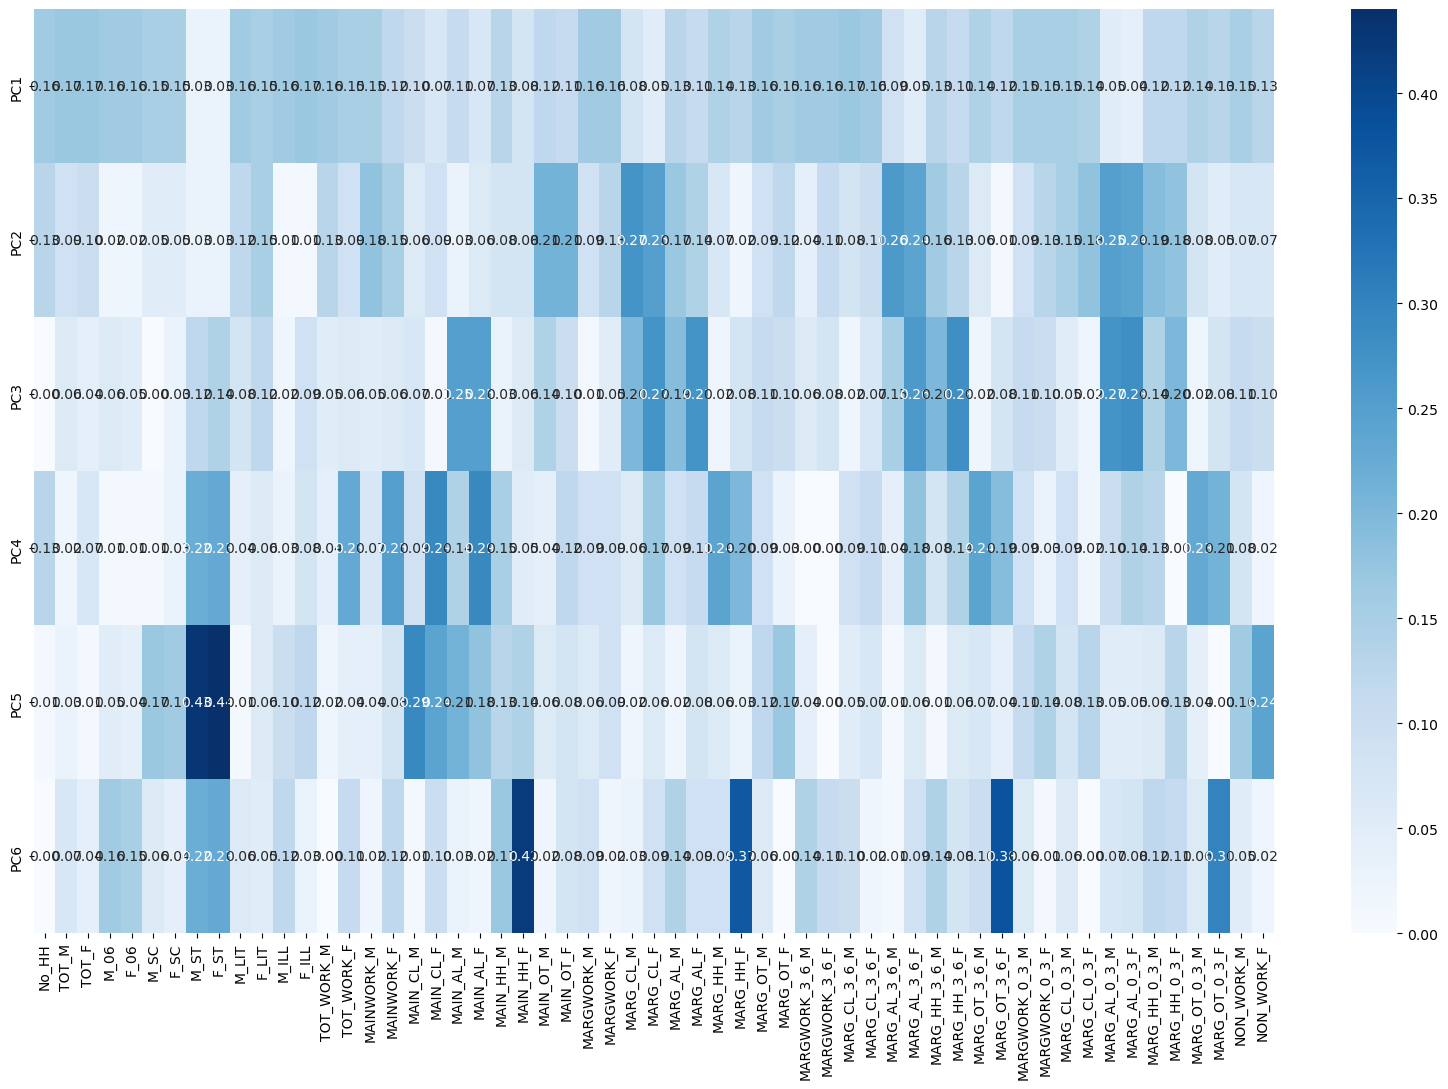

In [58]:
# Compare how the original features influence various PCs
plt.figure(figsize = (20,12))
sns.heatmap(abs(df_pca_loading), annot = True, cmap = 'Blues',fmt = '.2f');

In [60]:
#In order to calculate PC scores we need loadings, below:
df_pca_loading

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,F_LIT,M_ILL,F_ILL,TOT_WORK_M,TOT_WORK_F,MAINWORK_M,MAINWORK_F,MAIN_CL_M,MAIN_CL_F,MAIN_AL_M,MAIN_AL_F,MAIN_HH_M,MAIN_HH_F,MAIN_OT_M,MAIN_OT_F,MARGWORK_M,MARGWORK_F,MARG_CL_M,MARG_CL_F,MARG_AL_M,MARG_AL_F,MARG_HH_M,MARG_HH_F,MARG_OT_M,MARG_OT_F,MARGWORK_3_6_M,MARGWORK_3_6_F,MARG_CL_3_6_M,MARG_CL_3_6_F,MARG_AL_3_6_M,MARG_AL_3_6_F,MARG_HH_3_6_M,MARG_HH_3_6_F,MARG_OT_3_6_M,MARG_OT_3_6_F,MARGWORK_0_3_M,MARGWORK_0_3_F,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
PC1,0.16,0.17,0.17,0.16,0.16,0.15,0.15,0.03,0.03,0.16,0.15,0.16,0.17,0.16,0.15,0.15,0.12,0.10,0.07,0.11,0.07,0.13,0.08,0.12,0.11,0.16,0.16,0.08,0.05,0.13,0.11,0.14,0.13,0.16,0.15,0.16,0.16,0.17,0.16,0.09,0.05,0.13,0.11,0.14,0.12,0.15,0.15,0.15,0.14,0.05,0.04,0.12,0.12,0.14,0.13,0.15,0.13
PC2,-0.13,-0.09,-0.10,-0.02,-0.02,-0.05,-0.05,0.03,0.03,-0.12,-0.15,-0.01,-0.01,-0.13,-0.09,-0.18,-0.15,0.06,0.09,-0.03,-0.06,-0.08,-0.08,-0.21,-0.21,0.09,0.13,0.27,0.25,0.17,0.14,0.07,0.02,-0.09,-0.12,-0.04,-0.11,0.08,0.10,0.26,0.24,0.16,0.13,0.06,0.01,-0.09,-0.13,0.15,0.18,0.25,0.24,0.19,0.18,0.08,0.05,-0.07,-0.07
PC3,-0.00,0.06,0.04,0.06,0.05,0.00,-0.03,-0.12,-0.14,0.08,0.12,-0.02,-0.09,0.05,-0.06,0.05,-0.06,-0.07,-0.01,-0.25,-0.25,0.03,-0.06,0.14,0.10,-0.01,-0.05,0.20,0.27,-0.19,-0.27,-0.02,-0.08,0.11,0.10,0.06,0.08,-0.02,-0.07,0.15,0.26,-0.20,-0.28,-0.02,-0.08,0.11,0.10,0.05,0.02,0.27,0.28,-0.14,-0.20,-0.02,-0.08,0.11,0.10
PC4,-0.13,-0.02,-0.07,0.01,0.01,0.01,-0.03,-0.22,-0.23,-0.04,-0.06,0.03,-0.08,-0.04,-0.23,-0.07,-0.25,-0.09,-0.29,-0.14,-0.29,0.15,0.05,-0.04,-0.12,0.09,-0.09,-0.06,-0.17,0.09,-0.11,0.24,0.20,0.09,0.03,-0.00,0.00,0.09,-0.11,-0.04,-0.18,0.08,-0.14,0.24,0.19,0.09,0.03,0.09,-0.02,-0.10,-0.14,0.13,0.00,0.23,0.21,0.08,0.02
PC5,-0.01,-0.03,-0.01,-0.05,-0.04,-0.17,-0.16,0.43,0.44,-0.01,0.06,-0.10,-0.12,-0.02,-0.04,-0.04,-0.08,-0.29,-0.24,-0.21,-0.18,-0.13,-0.14,0.06,0.08,0.06,0.09,-0.02,-0.06,0.02,0.08,-0.06,-0.03,0.12,0.17,-0.04,0.00,0.05,0.07,-0.01,-0.06,0.01,0.06,-0.07,-0.04,0.11,0.14,0.08,0.13,-0.05,-0.05,0.06,0.13,-0.04,0.00,0.16,0.24
PC6,0.00,-0.07,-0.04,-0.16,-0.15,-0.06,-0.04,0.22,0.23,-0.06,-0.05,-0.12,-0.03,-0.00,0.11,0.02,0.12,-0.01,0.10,-0.03,0.02,0.17,0.42,0.02,0.08,-0.09,0.02,0.03,0.09,-0.14,-0.09,0.09,0.37,-0.06,0.00,-0.14,-0.11,-0.10,0.02,0.01,0.09,-0.14,-0.08,0.10,0.38,-0.06,0.01,-0.06,-0.00,0.07,0.08,-0.12,-0.11,0.06,0.30,-0.05,-0.02


In [54]:
df_pca_loading.style.highlight_max(color = 'lightgreen', axis = 0)    

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,F_LIT,M_ILL,F_ILL,TOT_WORK_M,TOT_WORK_F,MAINWORK_M,MAINWORK_F,MAIN_CL_M,MAIN_CL_F,MAIN_AL_M,MAIN_AL_F,MAIN_HH_M,MAIN_HH_F,MAIN_OT_M,MAIN_OT_F,MARGWORK_M,MARGWORK_F,MARG_CL_M,MARG_CL_F,MARG_AL_M,MARG_AL_F,MARG_HH_M,MARG_HH_F,MARG_OT_M,MARG_OT_F,MARGWORK_3_6_M,MARGWORK_3_6_F,MARG_CL_3_6_M,MARG_CL_3_6_F,MARG_AL_3_6_M,MARG_AL_3_6_F,MARG_HH_3_6_M,MARG_HH_3_6_F,MARG_OT_3_6_M,MARG_OT_3_6_F,MARGWORK_0_3_M,MARGWORK_0_3_F,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
PC1,0.160000,0.170000,0.170000,0.160000,0.160000,0.150000,0.150000,0.030000,0.030000,0.160000,0.150000,0.160000,0.170000,0.160000,0.150000,0.150000,0.120000,0.100000,0.070000,0.110000,0.070000,0.130000,0.080000,0.120000,0.110000,0.160000,0.160000,0.080000,0.050000,0.130000,0.110000,0.140000,0.130000,0.160000,0.150000,0.160000,0.160000,0.170000,0.160000,0.090000,0.050000,0.130000,0.110000,0.140000,0.120000,0.150000,0.150000,0.150000,0.140000,0.050000,0.040000,0.120000,0.120000,0.140000,0.130000,0.150000,0.130000
PC2,-0.130000,-0.090000,-0.100000,-0.020000,-0.020000,-0.050000,-0.050000,0.030000,0.030000,-0.120000,-0.150000,-0.010000,-0.010000,-0.130000,-0.090000,-0.180000,-0.150000,0.060000,0.090000,-0.030000,-0.060000,-0.080000,-0.080000,-0.210000,-0.210000,0.090000,0.130000,0.270000,0.250000,0.170000,0.140000,0.070000,0.020000,-0.090000,-0.120000,-0.040000,-0.110000,0.080000,0.100000,0.260000,0.240000,0.160000,0.130000,0.060000,0.010000,-0.090000,-0.130000,0.150000,0.180000,0.250000,0.240000,0.190000,0.180000,0.080000,0.050000,-0.070000,-0.070000
PC3,-0.000000,0.060000,0.040000,0.060000,0.050000,0.000000,-0.030000,-0.120000,-0.140000,0.080000,0.120000,-0.020000,-0.090000,0.050000,-0.060000,0.050000,-0.060000,-0.070000,-0.010000,-0.250000,-0.250000,0.030000,-0.060000,0.140000,0.100000,-0.010000,-0.050000,0.200000,0.270000,-0.190000,-0.270000,-0.020000,-0.080000,0.110000,0.100000,0.060000,0.080000,-0.020000,-0.070000,0.150000,0.260000,-0.200000,-0.280000,-0.020000,-0.080000,0.110000,0.100000,0.050000,0.020000,0.270000,0.280000,-0.140000,-0.200000,-0.020000,-0.080000,0.110000,0.100000
PC4,-0.130000,-0.020000,-0.070000,0.010000,0.010000,0.010000,-0.030000,-0.220000,-0.230000,-0.040000,-0.060000,0.030000,-0.080000,-0.040000,-0.230000,-0.070000,-0.250000,-0.090000,-0.290000,-0.140000,-0.290000,0.150000,0.050000,-0.040000,-0.120000,0.090000,-0.090000,-0.060000,-0.170000,0.090000,-0.110000,0.240000,0.200000,0.090000,0.030000,-0.000000,0.000000,0.090000,-0.110000,-0.040000,-0.180000,0.080000,-0.140000,0.240000,0.190000,0.090000,0.030000,0.090000,-0.020000,-0.100000,-0.140000,0.130000,0.000000,0.230000,0.210000,0.080000,0.020000
PC5,-0.010000,-0.030000,-0.010000,-0.050000,-0.040000,-0.170000,-0.160000,0.430000,0.440000,-0.010000,0.060000,-0.100000,-0.120000,-0.020000,-0.040000,-0.040000,-0.080000,-0.290000,-0.240000,-0.210000,-0.180000,-0.130000,-0.140000,0.060000,0.080000,0.060000,0.090000,-0.020000,-0.060000,0.020000,0.080000,-0.060000,-0.030000,0.120000,0.170000,-0.040000,0.000000,0.050000,0.070000,-0.010000,-0.060000,0.010000,0.060000,-0.070000,-0.040000,0.110000,0.140000,0.080000,0.130000,-0.050000,-0.050000,0.060000,0.130000,-0.040000,0.000000,0.160000,0.240000
PC6,0.000000,-0.070000,-0.040000,-0.160000,-0.150000,-0.060000,-0.040000,0.220000,0.230000,-0.060000,-0.050000,-0.120000,-0.030000,-0.000000,0.110000,0.020000,0.120000,-0.010000,0.100000,-0.030000,0.020000,0.170000,0.420000,0.020000,0.080000,-0.090000,0.020000,0.030000,0.090000,-0.140000,-0.090000,0.090000,0.370000,-0.060000,0.000000,-0.140000,-0.110000,-0.100000,0.020000,0.010000,0.090000,-0.140000,-0.080000,0.100000,0.380000,-0.060000,0.010000,-0.060000,-0.000000,0.070000,0.080000,-0.120000,-0.110000,0.060000,0.300000,-0.050000,-0.020000


### Linear equation for first PC.

In [61]:
#...and we need the original scaled features
df_num_scaled.iloc[0]

No_HH            -0.904738
TOT_M            -0.771236
TOT_F            -0.815563
M_06             -0.561012
F_06             -0.507738
M_SC             -0.958575
F_SC             -0.957049
M_ST             -0.423306
F_ST             -0.476423
M_LIT            -0.798097
F_LIT            -0.733477
M_ILL            -0.604015
F_ILL            -0.798229
TOT_WORK_M       -0.859260
TOT_WORK_F       -1.010238
MAINWORK_M       -0.872367
MAINWORK_F       -0.898216
MAIN_CL_M        -1.042844
MAIN_CL_F        -0.986630
MAIN_AL_M        -0.851060
MAIN_AL_F        -0.683276
MAIN_HH_M        -0.630766
MAIN_HH_F        -0.407555
MAIN_OT_M        -0.624042
MAIN_OT_F        -0.611637
MARGWORK_M       -0.516943
MARGWORK_F       -0.966512
MARG_CL_M        -0.321809
MARG_CL_F        -0.485053
MARG_AL_M        -0.331426
MARG_AL_F        -0.860192
MARG_HH_M        -0.377984
MARG_HH_F        -0.453026
MARG_OT_M        -0.548764
MARG_OT_F        -0.614625
MARGWORK_3_6_M   -0.648040
MARGWORK_3_6_F   -0.663795
M

In [68]:
df_comp = pd.DataFrame(pca.components_.T,index=list(df_num_scaled), columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
df_comp

,PC1,PC2,PC3,PC4,PC5,PC6
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022,0.004083
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026,-0.073389
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847,-0.043647
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248,-0.157957
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848,-0.154436
M_SC,0.151358,-0.045111,0.002569,0.012485,-0.173007,-0.064295
F_SC,0.151567,-0.051924,-0.025101,-0.029893,-0.159803,-0.040518
M_ST,0.027234,0.027679,-0.123504,-0.222247,0.433163,0.222591
F_ST,0.028183,0.030223,-0.139769,-0.229754,0.438792,0.225531
M_LIT,0.161993,-0.115355,0.082168,-0.035163,-0.009101,-0.055465


In [75]:
for i in df_comp.columns:
    pc_score = np.dot(df_comp[i], df_num_scaled.iloc[0])
    print(round(pc_score, 6), end = ' ')

-4.617263 0.138116 0.328545 1.543697 0.353737 -0.420947 

In [69]:
#...and we need the original scaled features
df_num_scaled.iloc[0]

No_HH            -0.904738
TOT_M            -0.771236
TOT_F            -0.815563
M_06             -0.561012
F_06             -0.507738
M_SC             -0.958575
F_SC             -0.957049
M_ST             -0.423306
F_ST             -0.476423
M_LIT            -0.798097
F_LIT            -0.733477
M_ILL            -0.604015
F_ILL            -0.798229
TOT_WORK_M       -0.859260
TOT_WORK_F       -1.010238
MAINWORK_M       -0.872367
MAINWORK_F       -0.898216
MAIN_CL_M        -1.042844
MAIN_CL_F        -0.986630
MAIN_AL_M        -0.851060
MAIN_AL_F        -0.683276
MAIN_HH_M        -0.630766
MAIN_HH_F        -0.407555
MAIN_OT_M        -0.624042
MAIN_OT_F        -0.611637
MARGWORK_M       -0.516943
MARGWORK_F       -0.966512
MARG_CL_M        -0.321809
MARG_CL_F        -0.485053
MARG_AL_M        -0.331426
MARG_AL_F        -0.860192
MARG_HH_M        -0.377984
MARG_HH_F        -0.453026
MARG_OT_M        -0.548764
MARG_OT_F        -0.614625
MARGWORK_3_6_M   -0.648040
MARGWORK_3_6_F   -0.663795
M

In [76]:
len(df_comp.iloc[:,0])

57

In [77]:
for i in range(len(df_comp.iloc[:,0])):
    for j in range(len(df_comp.index)):
        if i == j:
            print(df_comp.iloc[i,0].round(3),'x',df_comp.index[j])

0.156 x No_HH
0.167 x TOT_M
0.166 x TOT_F
0.162 x M_06
0.163 x F_06
0.151 x M_SC
0.152 x F_SC
0.027 x M_ST
0.028 x F_ST
0.162 x M_LIT
0.147 x F_LIT
0.162 x M_ILL
0.165 x F_ILL
0.16 x TOT_WORK_M
0.146 x TOT_WORK_F
0.146 x MAINWORK_M
0.124 x MAINWORK_F
0.103 x MAIN_CL_M
0.075 x MAIN_CL_F
0.113 x MAIN_AL_M
0.074 x MAIN_AL_F
0.132 x MAIN_HH_M
0.083 x MAIN_HH_F
0.124 x MAIN_OT_M
0.111 x MAIN_OT_F
0.165 x MARGWORK_M
0.155 x MARGWORK_F
0.082 x MARG_CL_M
0.049 x MARG_CL_F
0.129 x MARG_AL_M
0.114 x MARG_AL_F
0.141 x MARG_HH_M
0.128 x MARG_HH_F
0.155 x MARG_OT_M
0.147 x MARG_OT_F
0.165 x MARGWORK_3_6_M
0.161 x MARGWORK_3_6_F
0.166 x MARG_CL_3_6_M
0.156 x MARG_CL_3_6_F
0.093 x MARG_AL_3_6_M
0.052 x MARG_AL_3_6_F
0.129 x MARG_HH_3_6_M
0.111 x MARG_HH_3_6_F
0.14 x MARG_OT_3_6_M
0.125 x MARG_OT_3_6_F
0.154 x MARGWORK_0_3_M
0.146 x MARGWORK_0_3_F
0.15 x MARG_CL_0_3_M
0.14 x MARG_CL_0_3_F
0.053 x MARG_AL_0_3_M
0.042 x MARG_AL_0_3_F
0.122 x MARG_HH_0_3_M
0.116 x MARG_HH_0_3_F
0.14 x MARG_OT_0_3_M
0.132